In [39]:
import numpy as np

# importamos bibliotecas para plotear
import matplotlib
import matplotlib.pyplot as plt

# para desplegar los plots en el notebook
%matplotlib inline

# para cómputo simbólico
from sympy import *

alpha, beta, x = symbols('alpha beta x')
f = symbols('f', cls=Function)
init_printing()

from ipywidgets import *
from IPython.display import display

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


def cobweb(f, x, y):
    """
    Dibuja un diagrama de telaraña para una función.
    """
    plt.axhline(linewidth=1.0, color="black")
    plt.axvline(linewidth=1.0, color="black")
    plt.ylim((y.min(),y.max()))
    indep = np.linspace(x.min(), x.max(), len(x))
        
    # grafica la funcion 
    plt.plot(indep,f(indep),'blue')
        
    # grafica la diagonal
    def diag(x):
        return x
    plt.plot(indep, diag(indep), 'black')

    # grafica la telaraña
    y0 = f(x[0])
    x0 = x[0]
    for i in range(len(x)):
        plt.hlines(y0, x0, y0,'r')
        x0 = y0
        y0 = f(x0)
        plt.vlines(x0, x0, y0,'r')

(0.0, 9.19)


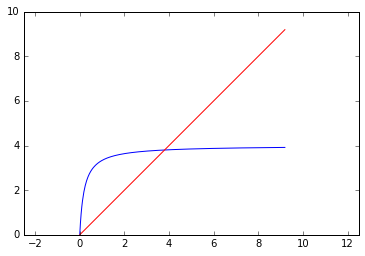

In [49]:
def g(x, alpha, beta):
    return (alpha*x)/(1 + (beta * x))

def plot_g(x, alpha, beta):
    pprint(x)
    y = np.linspace(x[0],x[1],300)
    g_y = g(y, alpha, beta)
    fig1 = plt.plot(y, g_y)
    fig1 = plt.plot(y, y, color='red')

    plt.axis('equal')

interact(plot_g,
         x=widgets.FloatRangeSlider(min=0, max=30, step=0.01, value=[0,1], continuous_update=False),
         alpha=widgets.IntSlider(min=0,max=30,step=1,value=1, continuous_update=False),
         beta=widgets.IntSlider(min=0,max=30,step=1,value=1, continuous_update=False))



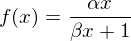

In [3]:


x1 = (alpha*x)/(1+beta*x)
ff=Eq(f(x), x1)
ff

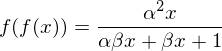

In [4]:
f1 = simplify(x1.subs(x, x1))

Eq(f(f(x)),f1)

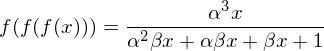

In [5]:
f2 = simplify(x1.subs(x, x1).subs(x,x1))
Eq(f(f(f(x))),f2)

In [15]:
collect((f2*x**-1*alpha**-3)**-1, x)

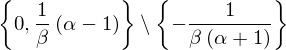

In [16]:
solveset(Eq(f1,x),x)

In [17]:
solveset(Eq(f1.subs(alpha, 13).subs(beta,6), x), x)